In [2]:
import pandas as pd
import os
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wajih\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


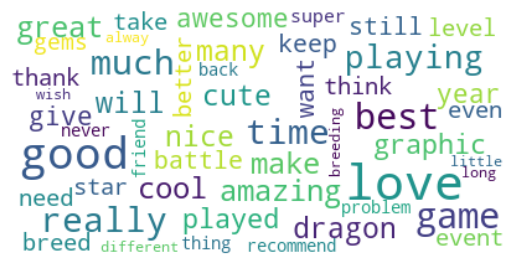

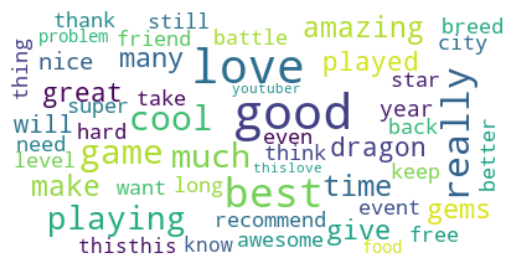

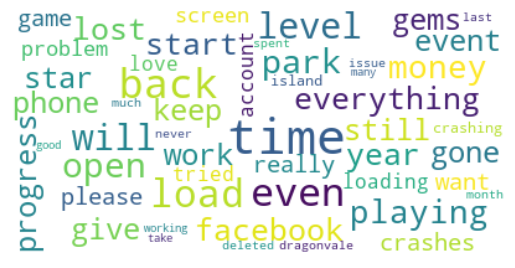

In [15]:
#Importing the data
file_DML = "reviews_DML_US_GP.csv"
file_DC = "reviews_DC_US_GP.csv"
file_DV = "reviews_DV_US_GP.csv"
file_ML = "reviews_ML_US_GP.csv"
file_DML_IOS = "reviews_DML_US_IOS.csv"
file_DC_IOS = "reviews_DC_US_IOS.csv"
file_DV_IOS = "reviews_DV_US_IOS.csv"
file_ML_IOS = "reviews_ML_US_IOS.csv"

df_DML = pd.read_csv(f"data/{file_DML}",sep="\t")
df_DC = pd.read_csv(f"data/{file_DC}",sep="\t")
df_DV = pd.read_csv(f"data/{file_DV}",sep="\t")
df_ML = pd.read_csv(f"data/{file_ML}", sep="\t")
df_DML_IOS = pd.read_csv(f"data/{file_DML_IOS}", sep="\t")
df_DC_IOS = pd.read_csv(f"data/{file_DC_IOS}", sep="\t")
df_DV_IOS = pd.read_csv(f"data/{file_DV_IOS}", sep="\t")
df_ML_IOS = pd.read_csv(f"data/{file_ML_IOS}", sep="\t")
#Function that cleans the comments from words that are irrelvent
def cleaning(text):
    words_to_remove = ["legends", "mania", "game", "gameloft", "play", "dragon", "city", "dragons","download","update","please","every","thing"]
    text = re.sub("[^0-9A-Za-z\-]+", " ", text) 
    text = re.sub("(?<!\w)\d+", "", text)
    text = re.sub("-(?!\w)", "", text)
    words = text.split()
    words = [word.lower() for word in words if len(word) >= 4 and word not in words_to_remove]
    text = " ".join(words)
    return text
#changing the column types to string to apply the cleaning function
df_DML["Content"] = df_DML["Content"].astype(str)
df_DC['Content'] = df_DC['Content'].astype(str)
df_DV['Content'] = df_DV['Content'].astype(str)
df_ML['Content'] = df_ML['Content'].astype(str)
df_DML_IOS['Content'] = df_DML_IOS['Content'].astype(str)
df_DC_IOS['Content'] = df_DC_IOS['Content'].astype(str)
df_DV_IOS['Content'] = df_DV_IOS['Content'].astype(str)
df_ML_IOS['Content'] = df_DML_IOS['Content'].astype(str)


df_DML["Content"] = df_DML["Content"].apply(cleaning)
df_DC["Content"] = df_DC["Content"].apply(cleaning)
df_DV["Content"] = df_DV["Content"].apply(cleaning)
df_ML["Content"] = df_ML["Content"].apply(cleaning)
df_DML_IOS['Content'] = df_DML_IOS['Content'].astype(str)
df_DC_IOS['Content'] = df_DC_IOS['Content'].astype(str)
df_DV_IOS['Content'] = df_DV_IOS['Content'].astype(str)
df_ML_IOS['Content'] = df_ML_IOS['Content'].astype(str)


stopwords = set(STOPWORDS)
#Input are the dataframe and the rating, the function returns the word cloud corresponding to that rating
def Cloud_based_on_rating(df,rating):
        df = df.dropna(subset=["Content"])
        Rating = df[df['Rating'] == rating]
        content = Rating['Content'].astype(str).tolist()
        text = "".join(content)
        word_cloud = WordCloud(collocations = False,stopwords=stopwords,max_font_size=40, max_words=50, background_color = 'white',).generate(text)
        plt.imshow(word_cloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()



Cloud_based_on_rating(df_DML,5)
Cloud_based_on_rating(df_DC,5)
Cloud_based_on_rating(df_DV,1)
